In [1]:
import pandas as pd
import numpy as np

# Load Data
df = pd.read_csv(r"C:\Customer_Churn_Data.csv")


In [2]:
print("Shape of Data:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nUnique values in Churn:", df['Churn'].unique())

Shape of Data: (8000, 17)

Missing Values:
 CustomerID            0
Gender                0
Age                   0
Tenure                0
PlanType              0
MonthlyCharges        0
InternetService     818
ContractType          0
PaymentMethod         0
TechSupport           0
OnlineSecurity        0
DeviceProtection      0
StreamingTV           0
StreamingMovies       0
PaperlessBilling      0
TotalCharges          0
Churn                 0
dtype: int64

Data Types:
 CustomerID           object
Gender               object
Age                   int64
Tenure                int64
PlanType             object
MonthlyCharges      float64
InternetService      object
ContractType         object
PaymentMethod        object
TechSupport          object
OnlineSecurity       object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
TotalCharges        float64
Churn                object
dtype: object

Unique values in Churn: ['No' 

In [3]:
#Clean TotalCharges (convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [4]:
# Fill Missing Values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [5]:
# Replace missing 'InternetService' values with 'Unknown'
df['InternetService'] = df['InternetService'].fillna('Unknown')

# Standardize categorical columns (strip spaces and title-case)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Convert 'Churn' to numeric (for later ML)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Quick validation
print("\n Missing Values after Cleaning:\n", df.isnull().sum().sum())
print(" Unique values in InternetService:", df['InternetService'].unique())
print("Data Types Updated:\n", df.dtypes)



 Missing Values after Cleaning:
 0
 Unique values in InternetService: ['Dsl' 'Fiber Optic' 'Unknown']
Data Types Updated:
 CustomerID           object
Gender               object
Age                   int64
Tenure                int64
PlanType             object
MonthlyCharges      float64
InternetService      object
ContractType         object
PaymentMethod        object
TechSupport          object
OnlineSecurity       object
DeviceProtection     object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
TotalCharges        float64
Churn                 int64
dtype: object


In [6]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Tenure              0
PlanType            0
MonthlyCharges      0
InternetService     0
ContractType        0
PaymentMethod       0
TechSupport         0
OnlineSecurity      0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'Age', 'Tenure']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [8]:
df.to_excel("Cleaned_Customer_Churn.xlsx", index=False)
print("✅ Cleaned dataset exported successfully to Excel!")


✅ Cleaned dataset exported successfully to Excel!


In [9]:
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Neha Prakash Jogdand\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("Customer_Churn_Data.csv")


In [12]:
#convert text-based columns into numeric form
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col not in ['CustomerID']:
        df[col] = label_enc.fit_transform(df[col])


In [13]:
#Define Features (X) and Target (y)
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']


In [14]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
#Train the XGBoost Model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1360
           1       1.00      1.00      1.00       240

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



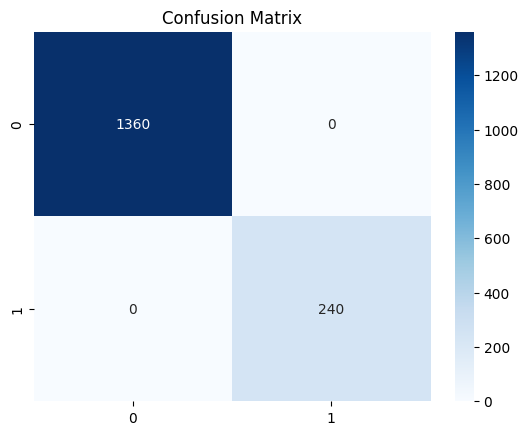

In [17]:
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


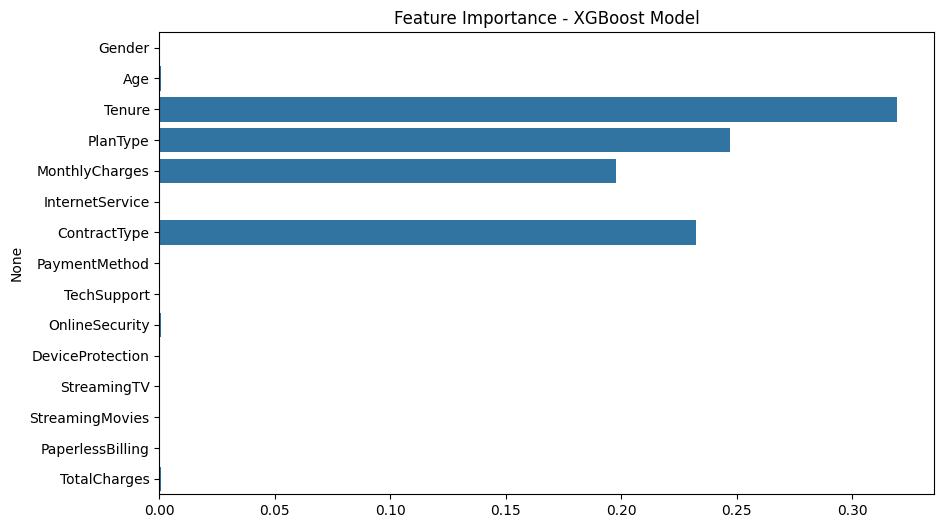

In [18]:
# Show feature importance (to see which columns influenced churn most)
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance - XGBoost Model")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation accuracy: [0.99875  0.999375 0.99875  0.99875  1.      ]
Mean accuracy: 0.999125


In [20]:
!pip install mysql-connector-python



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Neha Prakash Jogdand\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [21]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Neha@123', 
    database='churn_db'
)

cursor = conn.cursor()
print(" Connection Successful!")


 Connection Successful!


In [22]:
print(df.columns)
print(len(df.columns))


Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'PlanType', 'MonthlyCharges',
       'InternetService', 'ContractType', 'PaymentMethod', 'TechSupport',
       'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'TotalCharges', 'Churn'],
      dtype='object')
17


In [23]:
# Convert X_test to a DataFrame (if it's not already)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add actual and predicted churn columns
X_test_df['ActualChurn'] = y_test.values
X_test_df['PredictedChurn'] = y_pred

print(X_test_df.head())
print("Shape after adding predictions:", X_test_df.shape)


     Gender       Age    Tenure  PlanType  MonthlyCharges  InternetService  \
0 -1.007528 -0.553462 -1.017152  0.577895        1.104289         0.474404   
1 -1.007528  1.387446  0.102110 -1.007415       -1.119292        -1.073091   
2 -1.007528 -0.821174  0.345428 -0.214760       -1.617886        -1.073091   
3  0.992528 -0.687318 -0.968489 -0.214760       -0.781408         0.474404   
4  0.992528 -0.151895 -1.455124 -1.007415       -0.924334        -1.073091   

   ContractType  PaymentMethod  TechSupport  OnlineSecurity  DeviceProtection  \
0     -0.749511      -1.330180      1.25848       -0.907679          0.982650   
1     -0.749511       1.342149     -0.79461       -0.907679         -1.017656   
2     -0.749511      -1.330180      1.25848        1.101711         -1.017656   
3      0.588155       1.342149     -0.79461       -0.907679          0.982650   
4     -0.749511      -0.439403     -0.79461       -0.907679          0.982650   

   StreamingTV  StreamingMovies  PaperlessBi

In [24]:
import mysql.connector

#  Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",  
    database="churn_db"   
)
cursor = conn.cursor()

# Combine CustomerID and Predictions
X_test_df = df.loc[X_test_df.index, ['CustomerID']].copy()
X_test_df['PredictionChurn'] = y_pred

# Update PredictionChurn in SQL for each customer
for _, row in X_test_df.iterrows():
    sql = "UPDATE customer_churn SET PredictionChurn = %s WHERE CustomerID = %s"
    cursor.execute(sql, (int(row['PredictionChurn']), row['CustomerID']))

conn.commit()
cursor.close()
conn.close()

print("PredictionChurn values successfully updated in 'customer_churn' table!")


PredictionChurn values successfully updated in 'customer_churn' table!


In [25]:
import numpy as np
import pandas as pd
import mysql.connector

# Make a copy of the full dataset
df_copy = df.copy()

# Ensure y_pred is a 1D NumPy array
y_pred = np.array(y_pred).flatten()

# ✅ Case 1: If X_test is a NumPy array, we need its indices from train_test_split
# We'll assume you split like: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# So let's recreate test indices properly
test_size = 0.2
test_len = int(len(df) * test_size)
test_indices = df.index[-test_len:]

# Add the new column
df_copy['PredictionChurn'] = 0

# Fill predictions for test rows
for i, idx in enumerate(test_indices):
    if i < len(y_pred):  # safety check
        df_copy.loc[idx, 'PredictionChurn'] = int(y_pred[i])

print("✅ Sample data preview:")
print(df_copy[['CustomerID', 'Churn', 'PredictionChurn']].head())

# ✅ Step 2: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",  # change this
    database="churn_db"   # change this
)
cursor = conn.cursor()

# ✅ Step 3: Update table
for _, row in df_copy.iterrows():
    cursor.execute(
        "UPDATE customer_churn SET PredictionChurn = %s WHERE CustomerID = %s",
        (int(row['PredictionChurn']), row['CustomerID'])
    )

conn.commit()
cursor.close()
conn.close()

print("✅ PredictionChurn values successfully updated in MySQL!")


✅ Sample data preview:
  CustomerID  Churn  PredictionChurn
0   CUST1000      0                0
1   CUST1001      1                0
2   CUST1002      0                0
3   CUST1003      0                0
4   CUST1004      0                0
✅ PredictionChurn values successfully updated in MySQL!


In [26]:
import mysql.connector

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",  # 🔹 replace this
    database="churn_db"   # 🔹 replace this (for example, customer_churn_db)
)
cursor = conn.cursor()

# ✅ Insert cleaned data
for _, row in df.iterrows():
    sql = """
    INSERT INTO customer_churn
    (CustomerID, Gender, Age, Tenure, PlanType, MonthlyCharges,
     InternetService, ContractType, PaymentMethod, TechSupport,
     OnlineSecurity, DeviceProtection, StreamingTV, StreamingMovies,
     PaperlessBilling, TotalCharges, Churn)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.execute(sql, tuple(row))

conn.commit()
cursor.close()
conn.close()

print("✅ All rows inserted successfully into customer_churn!")


✅ All rows inserted successfully into customer_churn!


In [27]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",        
    database="churn_db"   
)
cursor = conn.cursor()

# Convert predictions to regular Python int (leave CustomerID as string)
y_pred_fixed = [int(x) for x in y_pred]

# Update PredictionChurn column for each customer
for cust_id, pred in zip(df["CustomerID"], y_pred_fixed):
    cursor.execute(
        "UPDATE customer_churn SET PredictionChurn = %s WHERE CustomerID = %s",
        (pred, cust_id)  # now we keep cust_id as string
    )

conn.commit()
cursor.close()
conn.close()

print("✅ PredictionChurn values successfully updated in SQL table!")


✅ PredictionChurn values successfully updated in SQL table!


In [28]:
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",   
    database="churn_db"    
)
cursor = conn.cursor()

# Clean up the columns just in case
df["CustomerID"] = df["CustomerID"].astype(str).str.strip()
y_pred_fixed = [int(x) for x in y_pred]  # Convert numpy.int64 → int

# Update each row
for cust_id, pred in zip(df["CustomerID"], y_pred_fixed):
    cursor.execute("""
        UPDATE customer_churn 
        SET PredictionChurn = %s 
        WHERE CustomerID = %s
    """, (pred, cust_id))

conn.commit()
cursor.close()
conn.close()

print(" PredictionChurn values updated successfully!")


 PredictionChurn values updated successfully!


In [29]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Load your churn data to get CustomerIDs
df = pd.read_csv("Customer_Churn_Data.csv")

# ---------- PAYMENT INFO ----------
regions = ["North", "South", "East", "West"]
payment_info = pd.DataFrame({
    "CustomerID": df["CustomerID"],
    "BillingRegion": [random.choice(regions) for _ in range(len(df))],
    "TotalSpent": np.random.uniform(300, 3000, len(df)).round(2),
    "LastPaymentDate": [
        (datetime(2025, 1, 1) + timedelta(days=random.randint(0, 300))).strftime("%Y-%m-%d")
        for _ in range(len(df))
    ]
})

# ---------- CUSTOMER FEEDBACK ----------
feedback_scores = [1, 2, 3, 4, 5]
customer_feedback = pd.DataFrame({
    "CustomerID": df["CustomerID"],
    "FeedbackScore": [random.choice(feedback_scores) for _ in range(len(df))],
    "ComplaintCount": np.random.randint(0, 10, len(df)),
    "LastInteractionDate": [
        (datetime(2025, 1, 1) + timedelta(days=random.randint(0, 300))).strftime("%Y-%m-%d")
        for _ in range(len(df))
    ]
})

# ---------- Save to CSV ----------
payment_info.to_csv("payment_info.csv", index=False)
customer_feedback.to_csv("customer_feedback.csv", index=False)

print("payment_info.csv and customer_feedback.csv generated successfully!")


payment_info.csv and customer_feedback.csv generated successfully!


In [31]:
import pandas as pd
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Neha@123",
    database="churn_db"   
)
cursor = conn.cursor()

# --- Insert payment_info ---
payment_data = pd.read_csv("payment_info.csv")
for _, row in payment_data.iterrows():
    cursor.execute("""
        INSERT INTO payment_info (CustomerID, BillingRegion, TotalSpent, LastPaymentDate)
        VALUES (%s, %s, %s, %s)
    """, tuple(row))

# --- Insert customer_feedback ---
feedback_data = pd.read_csv("customer_feedback.csv")
for _, row in feedback_data.iterrows():
    cursor.execute("""
        INSERT INTO customer_feedback (CustomerID, FeedbackScore, ComplaintCount, LastInteractionDate)
        VALUES (%s, %s, %s, %s)
    """, tuple(row))

conn.commit()
cursor.close()
conn.close()

print(" Both tables inserted successfully into MySQL!")


 Both tables inserted successfully into MySQL!
